## Credit Score

A multiclass classification algorithm will be used. <br>
In this approach we will use Random Forest. <br>
The goal is to classify users credit score: Good, Standard, Bad.<br>
The model might be used by banks to decide if they want to give credit to a person.


## Data

Data contains a person’s credit-related information.

Data source: https://www.kaggle.com/datasets/parisrohan/credit-score-classification/download

Data size: 31 MB (10 MB archived)

Data contains 100000 rows × 28 columns.



### Fields

| Field Name                | Data Type | Description                                                                                     |
|---------------------------|-----------|-------------------------------------------------------------------------------------------------|
| ID                        | object    | A unique identifier for each record in the dataset                                              |
| Customer_ID               | object    | A unique identifier for each customer                                                           |
| Month                     | object    | The month in which the record was created or updated                                            |
| Name                      | object    | The name of the individual                                                                      |
| Age                       | object    | The age of the individual                                                                       |
| SSN                       | object    | The Social Security Number                                                                      |
| Occupation                | object    | The occupation or job title of the individual                                                   |
| Annual_Income             | object    | The annual income of the individual                                                             |
| Monthly_Inhand_Salary     | float64   | The monthly salary received.                                                                    |
| Num_Bank_Accounts         | int64     | The number of bank accounts the individual holds                                                |
| Num_Credit_Card           | int64     | The number of credit cards the individual owns                                                  |
| Interest_Rate             | int64     | The interest rate on the individual's primary loan                                              |
| Num_of_Loan               | object    | The number of loans the individual currently has                                                |
| Type_of_Loan              | object    | The type of loan.                                                                               |
| Delay_from_due_date       | int64     | The number of days the individual is delayed on their loan payment                              |
| Num_of_Delayed_Payment    | object    | Delayed payments                                                                                |
| Changed_Credit_Limit      | object    | Changed credit limit                                                                             |
| Num_Credit_Inquiries      | float64   | The number of inquiries made into the individual's credit.                                       |
| Credit_Mix                | object    | The types of credit the individual has.                                                          |
| Outstanding_Debt          | object    | The total amount of debt the individual currently has                                     |
| Credit_Utilization_Ratio  | float64   | The ratio of current credit card balances to credit limits                                      |
| Credit_History_Age        | object    | The age of the individual's oldest credit line                                              |
| Payment_of_Min_Amount     | object    | Payment of minimum amount                                                                 |
| Total_EMI_per_month       | float64   | The total monthly EMI (Equated Monthly Installment) the individual is responsible for       |
| Amount_invested_monthly   | object    | The amount the individual invests on a monthly basis                                      |
| Payment_Behaviour         | object    | Describes the individuals payment behaviour                                                  |
| Monthly_Balance           | object    | The average monthly balance in the individual's bank accounts                                 |
| Credit_Score              | object    | The individuals credit score                                                                   |

In [200]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, roc_curve, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer

pd.set_option('display.max_columns', 500)

In [ ]:
path = "./credit_data/train.csv"
data = pd.read_csv(path)

Now lets explore the data

In [202]:
data.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [203]:
data["Credit_Score"].drop_duplicates()

0         Good
7     Standard
56        Poor
Name: Credit_Score, dtype: object

In [204]:
data["Payment_Behaviour"].drop_duplicates()

0     High_spent_Small_value_payments
1      Low_spent_Large_value_payments
2     Low_spent_Medium_value_payments
3      Low_spent_Small_value_payments
4    High_spent_Medium_value_payments
5                              !@9#%8
9     High_spent_Large_value_payments
Name: Payment_Behaviour, dtype: object

Let's look at distinct values for every row

In [205]:
for c in data.columns:
    print(data[c].drop_duplicates())
    print('-------------------------------')

0         0x1602
1         0x1603
2         0x1604
3         0x1605
4         0x1606
          ...   
99995    0x25fe9
99996    0x25fea
99997    0x25feb
99998    0x25fec
99999    0x25fed
Name: ID, Length: 100000, dtype: object
-------------------------------
0         CUS_0xd40
8        CUS_0x21b1
16       CUS_0x2dbc
24       CUS_0xb891
32       CUS_0x1cdb
            ...    
99960    CUS_0x372c
99968     CUS_0xf16
99976    CUS_0xaf61
99984    CUS_0x8600
99992    CUS_0x942c
Name: Customer_ID, Length: 12500, dtype: object
-------------------------------
0     January
1    February
2       March
3       April
4         May
5        June
6        July
7      August
Name: Month, dtype: object
-------------------------------
0           Aaron Maashoh
7                     NaN
8         Rick Rothackerj
16                 Langep
24                 Jasond
               ...       
99928      Yinka Adegokej
99936    Sabina Zawadzkig
99976      Chris Wickhamm
99984      Sarah McBridec
99992     

## Prepare features

Models can work with numerical data only, but many fields have an "object" type. So we need to convert ether to numerical or make "one hot encoder" from categorical data.<br>
Also, Credit_History_Age has the format "N years and N months". We will convert it to the number of months.<br>
And finally, we will fill Nones with medians using the "fillna" method.<br>

In [207]:
def feature_prepare(df):
    data = df.copy()
    data = data.fillna(0)
    numerical_type = [
    'Age', 'Delay_from_due_date', 'Annual_Income', 'Num_of_Loan',
    'Num_of_Delayed_Payment', 'Outstanding_Debt',
    'Amount_invested_monthly', 'Monthly_Balance'
    ]
    for feature in numerical_type:
        data[feature] = data[feature].replace('[^-0-9.]', '', regex=True).astype("float64", errors='ignore')
    data['Age'] = data['Age'][(10 < data['Age']) & (data['Age'] < 100)]
    
    years_months = data["Credit_History_Age"].str.extract(r'(\d+)\s*Years?\s*and\s*(\d+)\s*Months?')
    years = pd.to_numeric(years_months[0], errors='coerce').fillna(0)
    months = pd.to_numeric(years_months[1], errors='coerce').fillna(0)
    data["Credit_History_Age"] = (years * 12 + months) // 12
    
    one_hot = ["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"]
    one_hot_features = pd.get_dummies(data[one_hot])
    data = data.drop(columns=one_hot)

    one_hot_features = one_hot_features.join(data['Type_of_Loan'].replace('and ', '', regex=True).str.get_dummies(', '))

    
    y = data['Credit_Score']
    x = data.drop(columns=["Credit_Score", "Name", "Type_of_Loan", "Customer_ID", "SSN", "ID", "Changed_Credit_Limit", "Month"])
    x = x.fillna(x.median())
    return x, y, one_hot_features

X, y, one_hot_features = feature_prepare(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=634356)


Data types should be all numeric now.

In [208]:
X_train.dtypes

Age                         float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
dtype: object

And separate data frame for "one-hot" encoded features. We will join them later, after the analysis.

In [210]:
one_hot_features

Occupation_Accountant  Occupation_Architect  Occupation_Developer  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   
...                      ...                   ...                   ...   
99995                  False                 False                 False   
99996                  False                 False                 False   
99997                  False                 False                 False   
99998                  False                 False                 False   
99999                  False                 False                 False   

       Occupation_Doctor  Occupation_Engineer  Occupation_Entrepreneur  \
0                  False                False                    False   
1                  False                False                    False   
2                  False                False                    False   
3                  False                False                    False   
4                  False                False                    False   
...                  ...                  ...                      ...   
99995              False                False                    False   
99996              False                False                    False   
99997              False                False                    False   
99998              False                False                    False   
99999              False                False                    False   

       Occupation_Journalist  Occupation_Lawyer  Occupation_Manager  \
0                      False              False               False   
1                      False              False               False   
2                      False              False               False   
3                      False              False               False   
4                      False              False               False   
...                      ...                ...                 ...   
99995                  False              False               False   
99996                  False              False               False   
99997                  False              False               False   
99998                  False              False               False   
99999                  False              False               False   

       Occupation_Mechanic  Occupation_Media_Manager  Occupation_Musician  \
0                    False                     False                False   
1                    False                     False                False   
2                    False                     False                False   
3                    False                     False                False   
4                    False                     False                False   
...                    ...                       ...                  ...   
99995                 True                     False                False   
99996                 True                     False                False   
99997                 True                     False                False   
99998                 True                     False                False   
99999                 True                     False                False   

       Occupation_Scientist  Occupation_Teacher  Occupation_Writer  \
0                      True               False              False   
1                      True               False              False   
2                      True               False              False   
3                      True               False              False   
4                      True               False              False   
...    

## Data distribution

Next lets look at the distribution of the fields

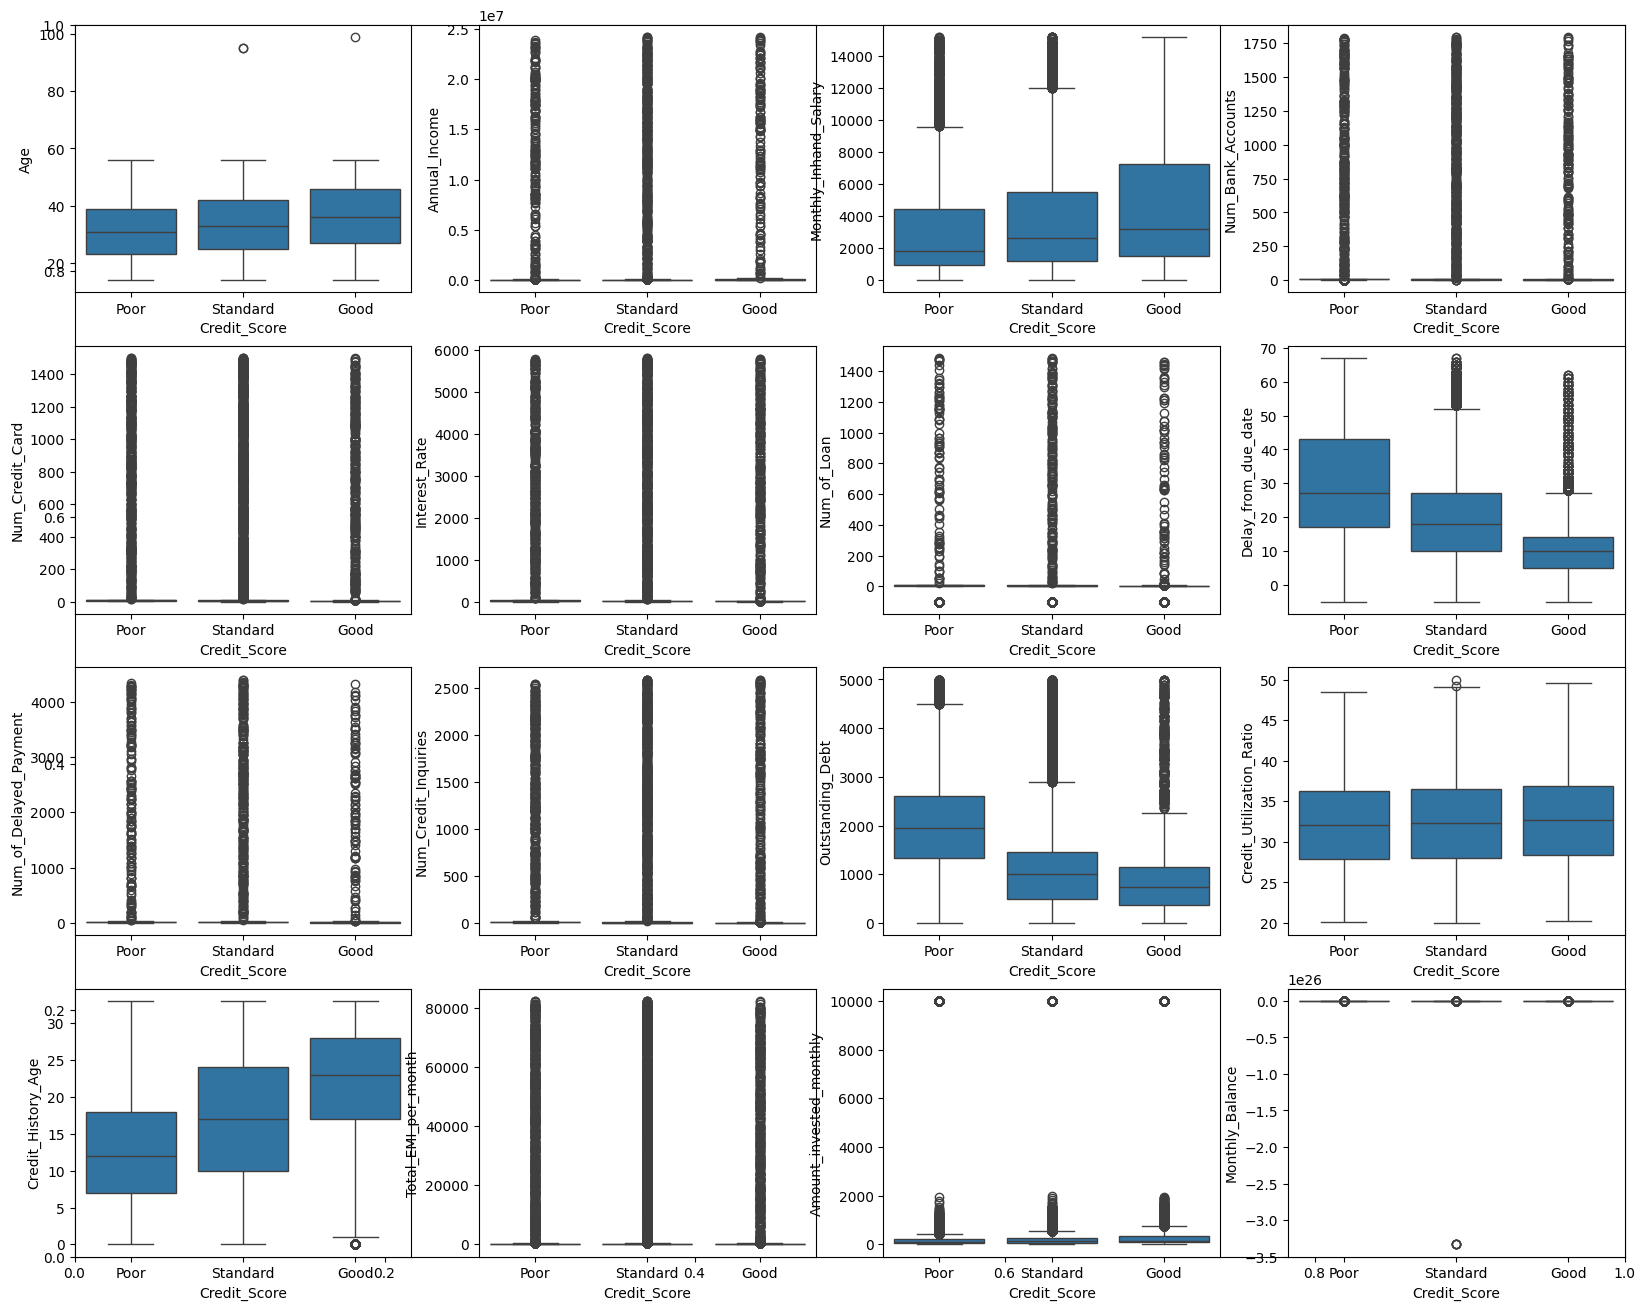

In [211]:
fig, ax = plt.subplots(figsize=(20, 16))
for i, feature in enumerate(X_train.columns):
    ax = fig.add_subplot(4, 4, i + 1)
    sns.boxplot(X_train.join(y_train), x="Credit_Score", order=["Poor", "Standard", "Good"], y=feature, ax=ax)

Graph shows that there are a lot of outliers in the data.

## Removing outliers

We will remove outliers using the interquartile range.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/375px-Boxplot_vs_PDF.svg.png 'IQR Wiki')
g

In [212]:
def remove_outliers_iqr(df, columns, iqr_multiplier=1.5):
    outliers_df = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        
        outliers_df[col] = (df[col] < (Q1 - iqr_multiplier * IQR)) | (df[col] > (Q3 + iqr_multiplier * IQR))
        
    print(f"Removing {len(df[outliers_df.any(axis=1)])} of {len(df)} rows.")
    return df[~outliers_df.any(axis=1)]

X_train = remove_outliers_iqr(X_train, X_train.columns, 5)


Removing 15829 of 80000 rows.


Now we will look at the distribution again it should be clearer now.

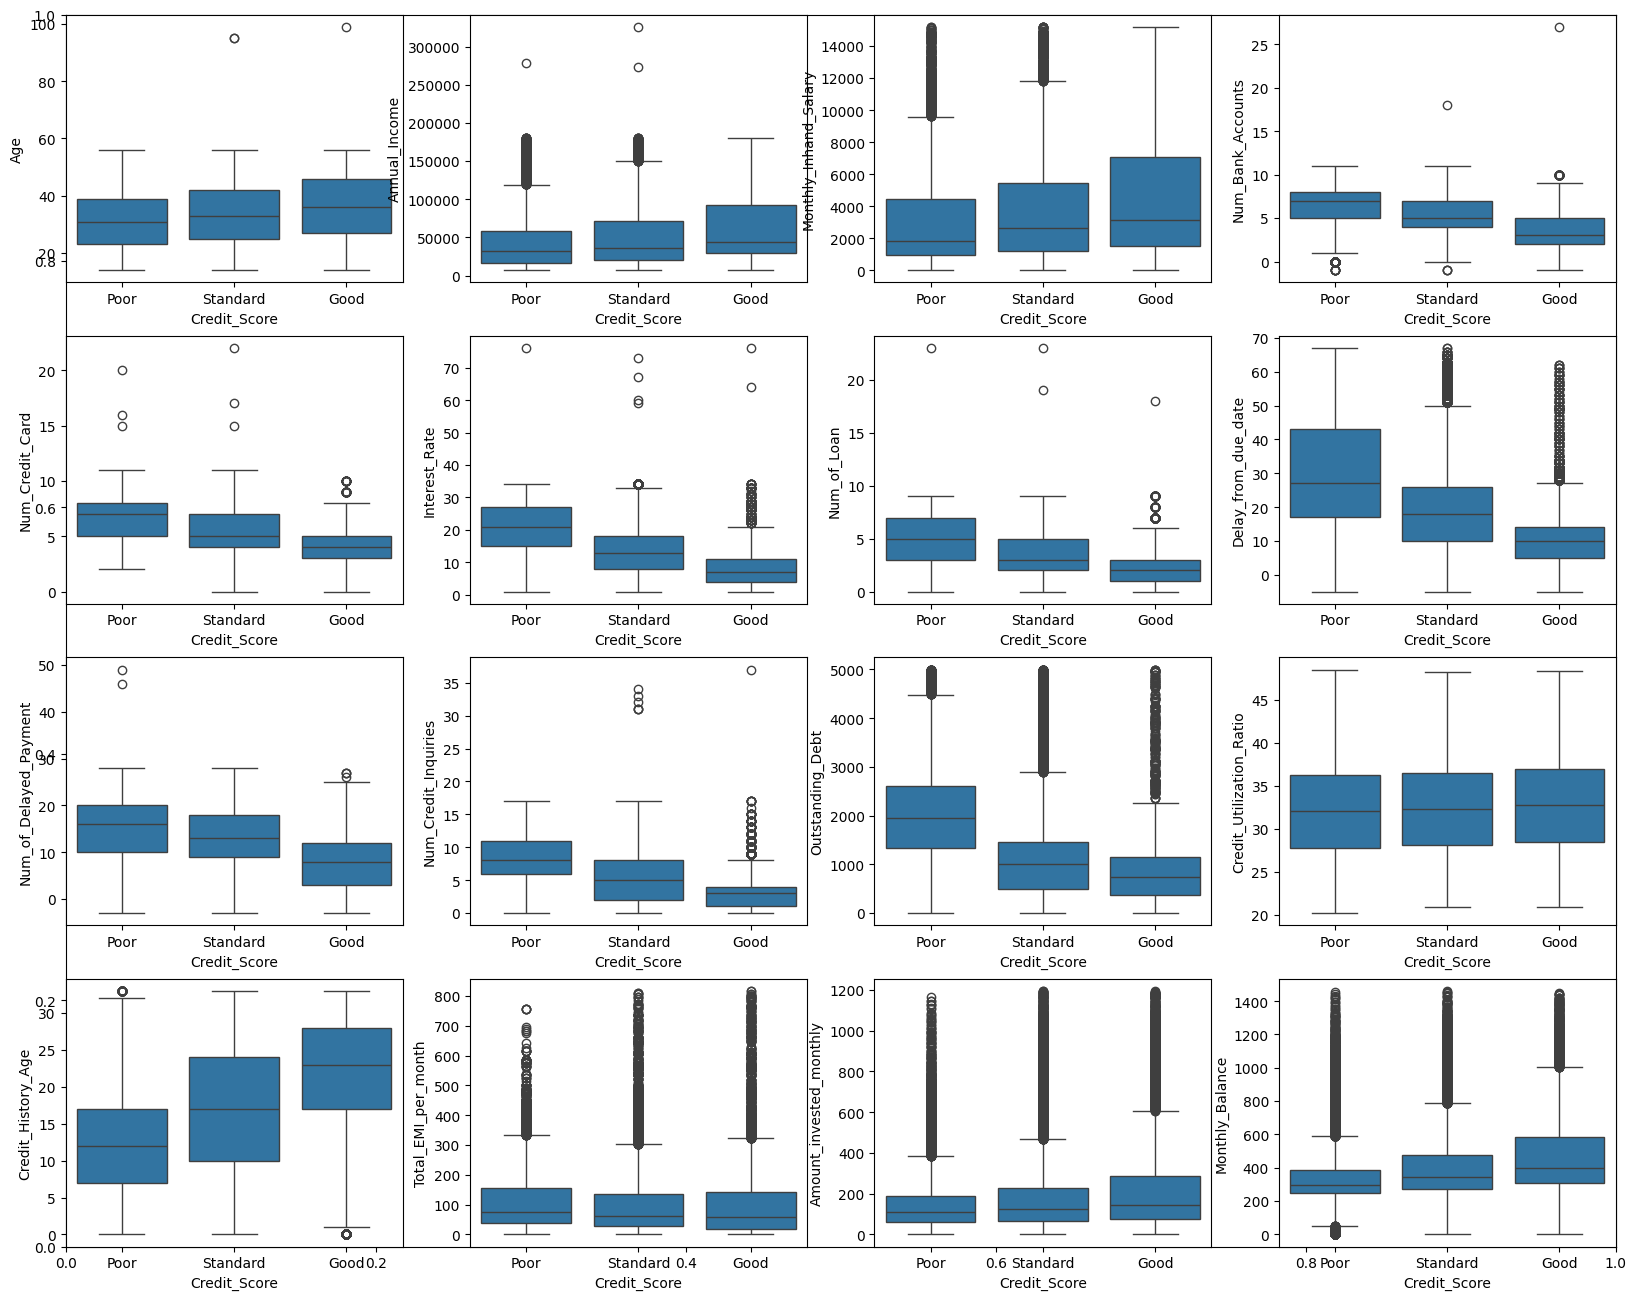

In [213]:
fig, ax = plt.subplots(figsize=(20, 16))
for i, feature in enumerate(X_train.columns):
    ax = fig.add_subplot(4, 4, i + 1)
    sns.boxplot(X_train.join(y_train), x="Credit_Score", order=["Poor", "Standard", "Good"], y=feature, ax=ax)

## Correlation matrix

Next, let's look at the correlation matrix.
But first, we will convert the score to numeric, so we can add it to our matrix.

In [214]:
numeric_score = y_train.apply(lambda x: 1 if x == "Good" else -1 if x == "Poor" else 0)

<Axes: >

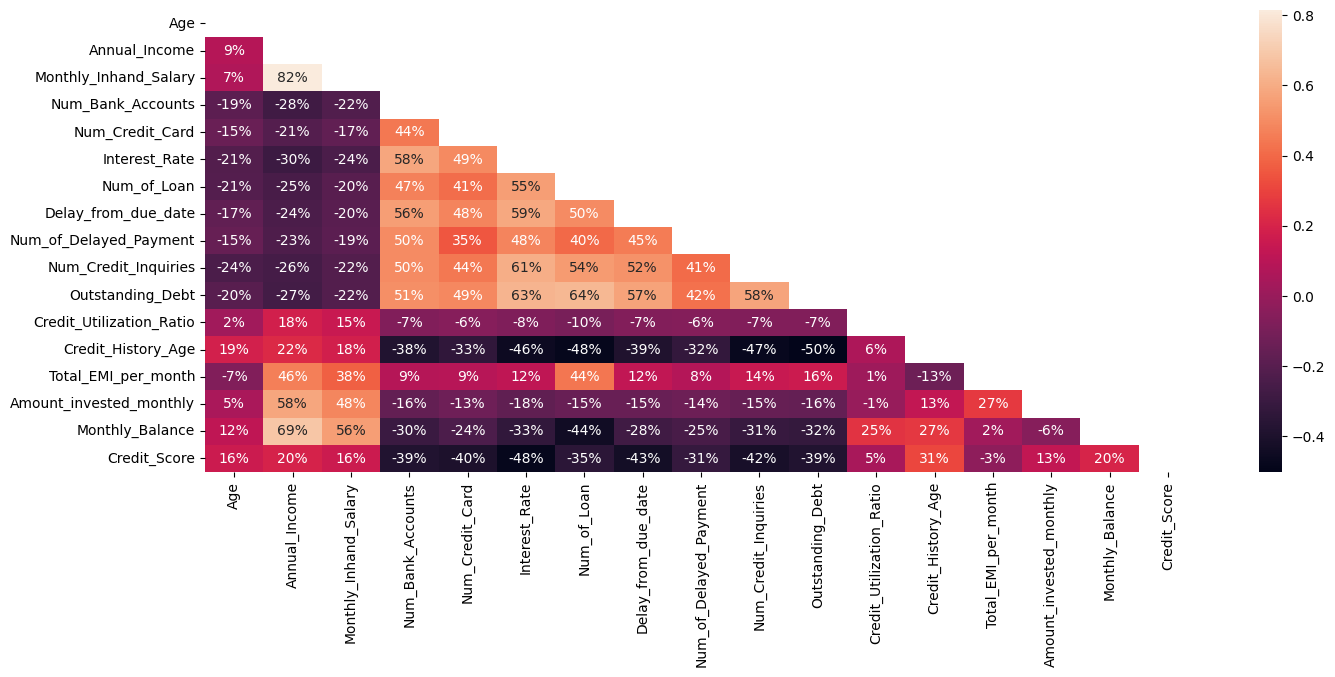

In [218]:
fig = plt.figure(figsize=(16, 6))
matrix = X_train.join(numeric_score).corr()
sns.heatmap(matrix, fmt=".0%", annot=True, mask=np.triu(matrix))

We can see that Credit_Score has a positive correlation with Credit_History_Age and a negative correlation with Interest_Rate, Delay_from_due_date etc. So we can expect them to be good features.
Also, there are highly correlated features, and it might lead to overfitting. We will use Random Forest because tree models are less sensitive to collinearity.

Let's make a pair plot and a few more visualisations to perform analysis.

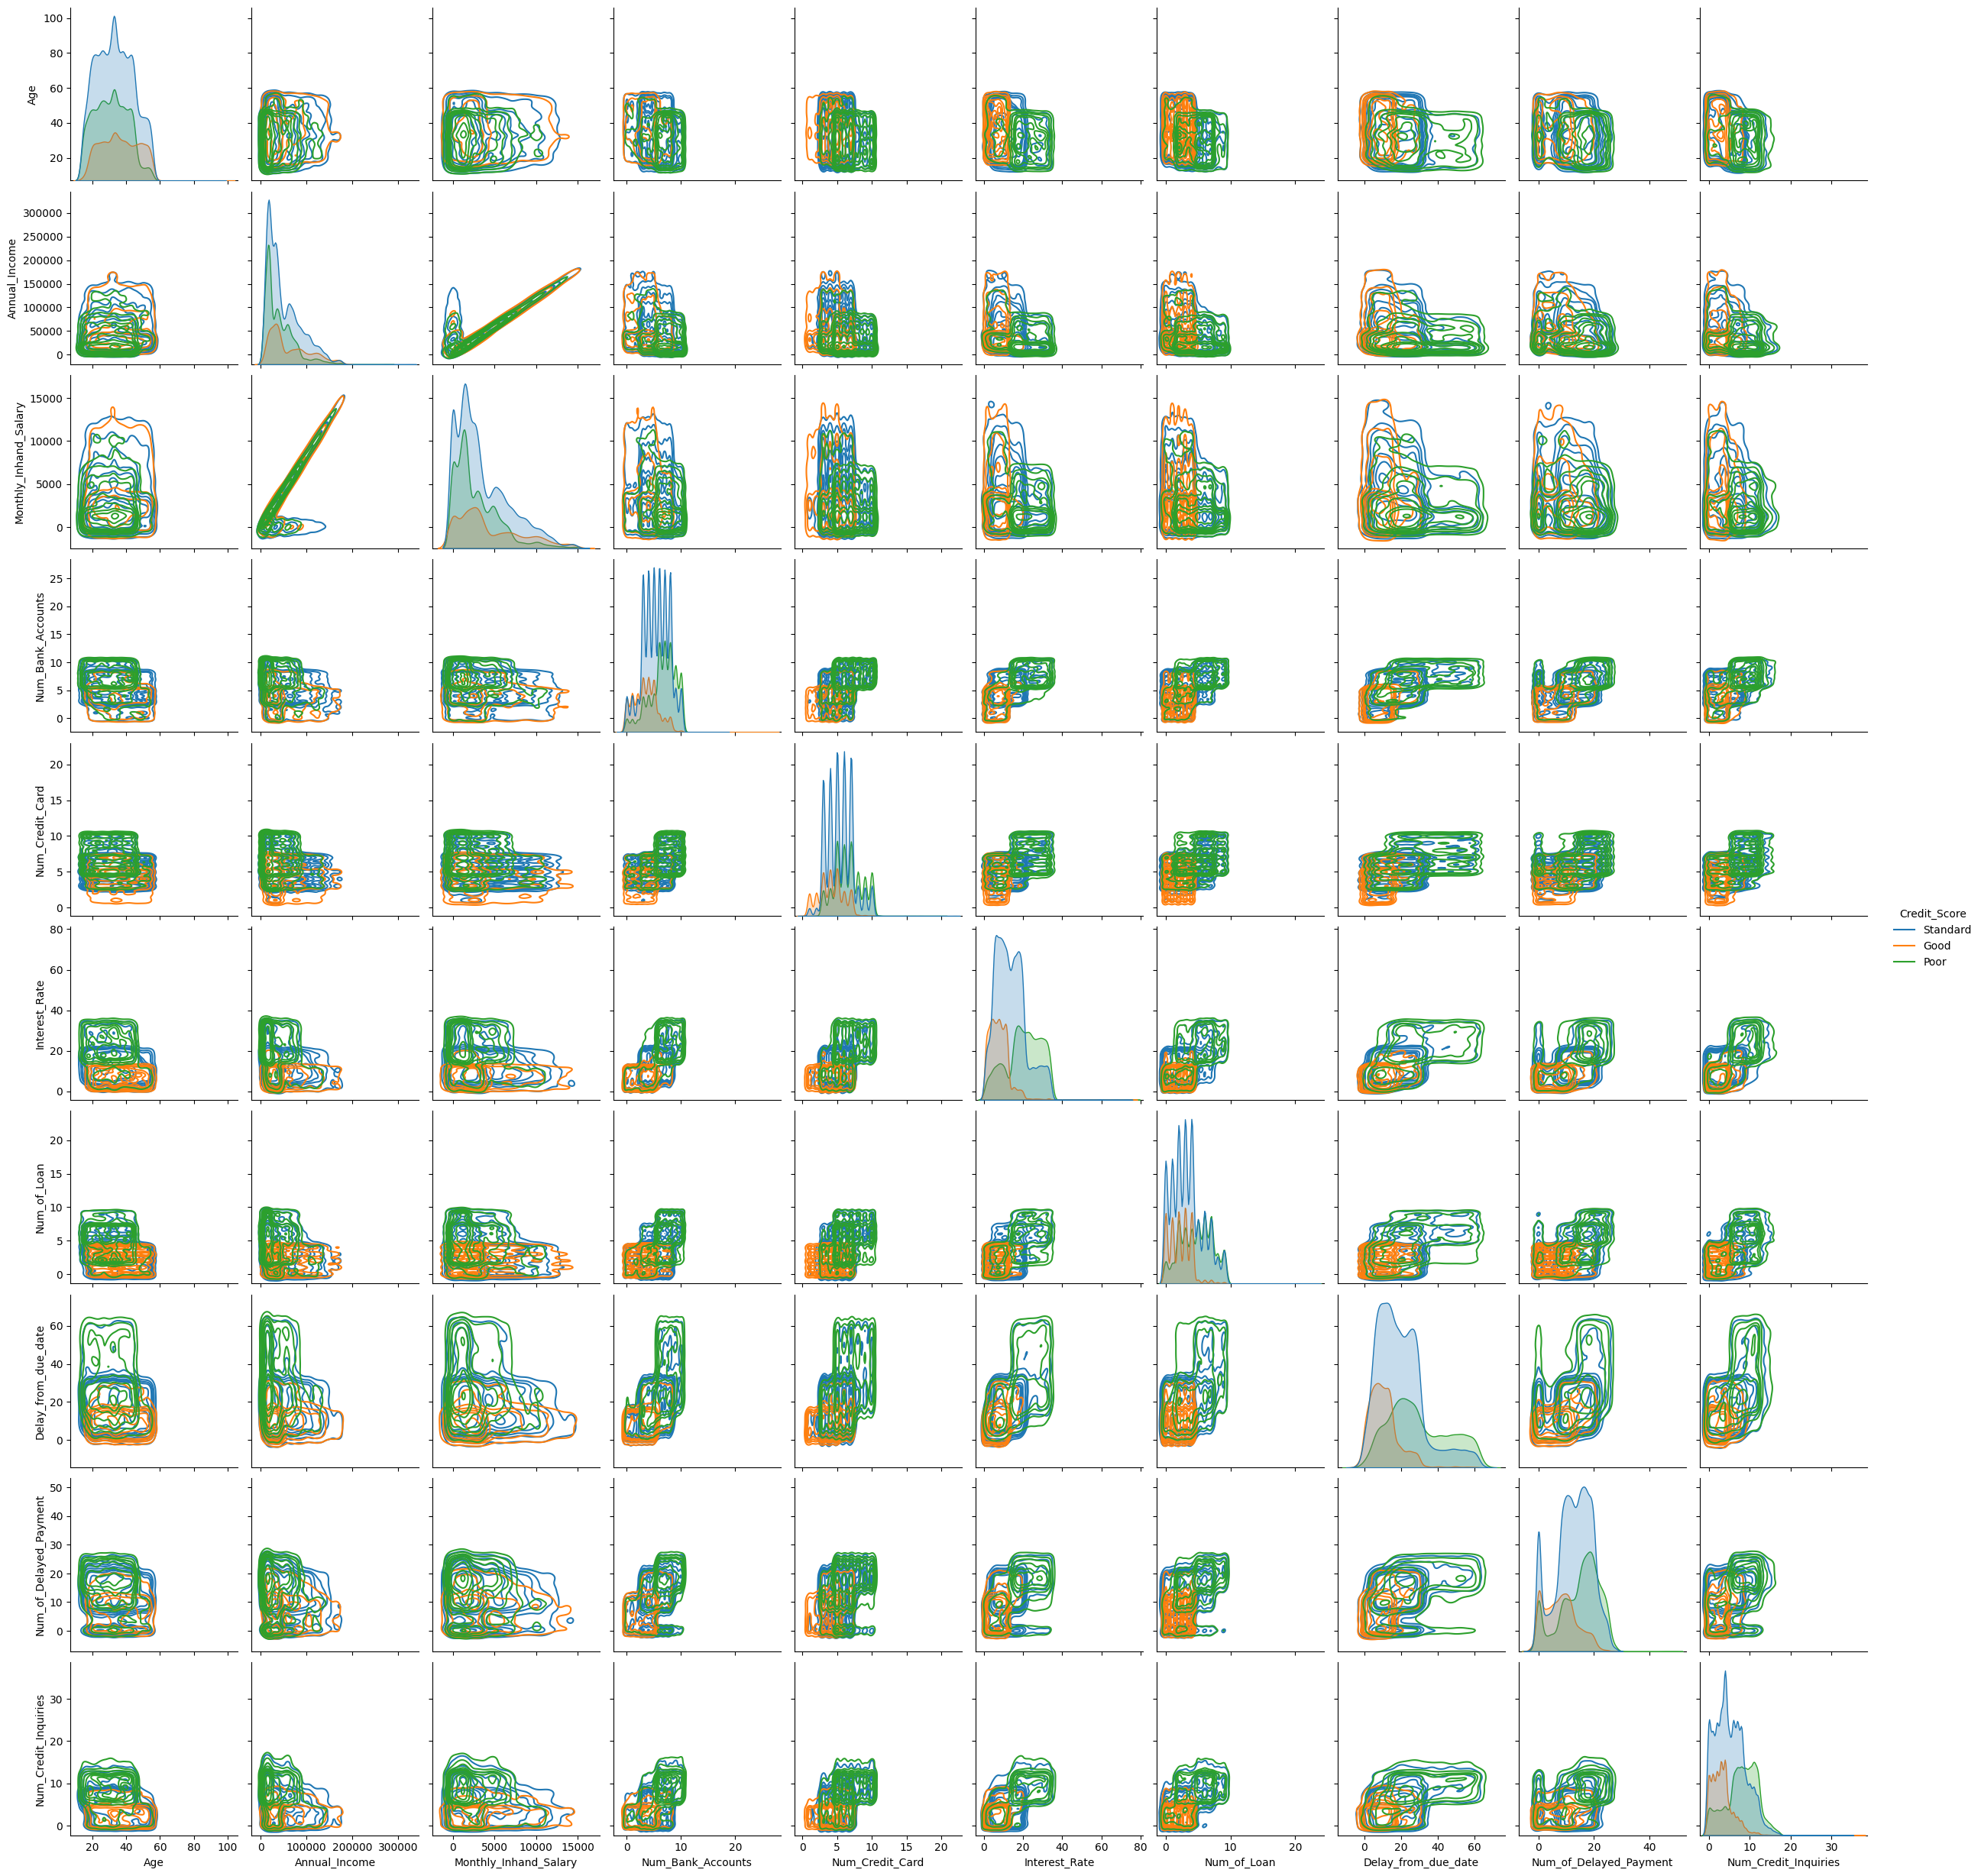

In [221]:
sns.pairplot(X_train.iloc[:, :10].join(y_train), hue='Credit_Score', kind="kde")

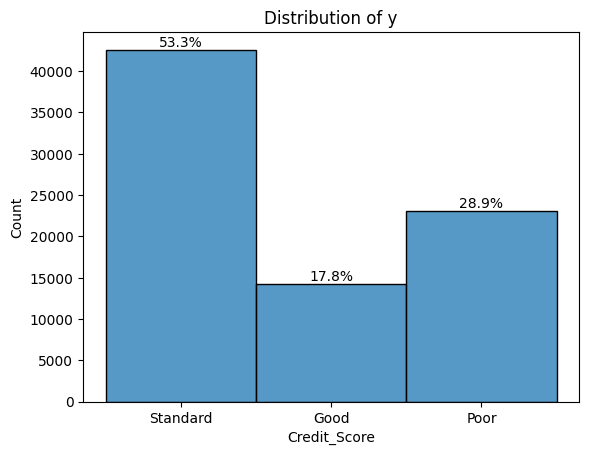

In [192]:
sns.histplot(y_train)
# Get the current plot and axis
ax = plt.gca()
rects = ax.patches

# Calculate total number of data points to get percentages
total = sum([rect.get_height() for rect in rects])

# Add labels
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f"{(height/total)*100:.1f}%", ha='center', va='bottom')

# Add title and labels as needed
plt.title(f"Distribution of y")

plt.show()

# Modeling

Let's add "one hot" features to X

In [222]:
X_train = X_train.join(one_hot_features)
X_test = X_test.join(one_hot_features)

In [223]:
y_train = y_train[X_train.index]

We will start with simple Random Forest classifier

In [233]:
clf = RandomForestClassifier(max_depth=3, random_state=4536574, n_estimators=100, n_jobs=-1)
clf.fit(X_train, y_train)
print(f"Train score: {clf.score(X_train, y_train)}, test score: {clf.score(X_test, y_test)}")

Train score: 0.6332455470539652, test score: 0.62615


It is important to check recall and precision to evaluate model performance.
For example, we know that our data has more than half of the "Standard" scores, so we could get a sane score just by predicting every label as "Standard".

In [234]:
print("Recall for labels: ", recall_score(pd.Series(clf.predict(X_test)), y_test, average=None))
print("Precision for labels: ", precision_score(pd.Series(clf.predict(X_test)), y_test, average=None))
print("F1 for labels: ", f1_score(pd.Series(clf.predict(X_test)), y_test, average=None))

Recall for labels:  [0.7790927  0.64067975 0.61450852]
Precision for labels:  [0.11133033 0.62098828 0.8019502 ]
F1 for labels:  [0.19482121 0.63068035 0.69582717]


Now it is clear that the first label "Good" has poor precision. <br>
Let's add the class_weight='balanced' parameter, to address the underrepresentation of the 'Good' class.

In [245]:
clf = RandomForestClassifier(max_depth=3, random_state=4536574, n_estimators=100, n_jobs=-1, class_weight='balanced')
clf.fit(X_train, y_train)
print(f"Train score: {clf.score(X_train, y_train)}, test score: {clf.score(X_test, y_test)}")
print("Recall for labels: ", recall_score(pd.Series(clf.predict(X_test)), y_test, average=None))
print("Precision for labels: ", precision_score(pd.Series(clf.predict(X_test)), y_test, average=None))
print("F1 for labels: ", f1_score(pd.Series(clf.predict(X_test)), y_test, average=None))

Train score: 0.6531299184990105, test score: 0.65125
Recall for labels:  [0.45966749 0.63417776 0.86051864]
Precision for labels:  [0.8416009  0.75241977 0.53090978]
F1 for labels:  [0.59458383 0.68825722 0.65667447]


It looks better now, but the model still is underfitted. <br>
Let's iterate over the max_depth of the model to find a better parameter. <br>

Score with depth=3 train: 0.6502314129435415, test: 0.64875, f1: 0.6442728159841843
Score with depth=4 train: 0.6566673419457387, test: 0.65465, f1: 0.6496121984016711
Score with depth=5 train: 0.6617163516230072, test: 0.66055, f1: 0.6547498212861345
Score with depth=6 train: 0.6623552695142666, test: 0.66115, f1: 0.6553994596909797
Score with depth=7 train: 0.6647551074472893, test: 0.66295, f1: 0.6569374741328495
Score with depth=8 train: 0.6665004441258512, test: 0.6634, f1: 0.6574053225505215
Score with depth=9 train: 0.6699599507565723, test: 0.6653, f1: 0.6593316088766933
Score with depth=10 train: 0.6815539729784482, test: 0.67465, f1: 0.6690560197623947
Score with depth=11 train: 0.6888002368671207, test: 0.6776, f1: 0.6719229420636313
Score with depth=12 train: 0.6974957535335276, test: 0.6809, f1: 0.675439364817468
Score with depth=13 train: 0.707780773246482, test: 0.68475, f1: 0.6791507946270965
Score with depth=14 train: 0.7241277212447991, test: 0.6887, f1: 0.68301161396

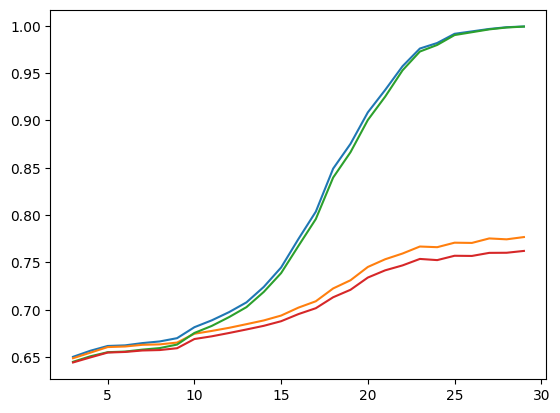

In [247]:
train_score, test_score = [], []
train_f1, test_f1 = [], []
depth = range(3, 30, 1)
for max_depth in depth:
    clf = RandomForestClassifier(max_depth=max_depth, random_state=45365745, n_estimators=100, class_weight='balanced', n_jobs=-1)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
    train_f1.append(f1_score(pd.Series(clf.predict(X_train)), y_train, average='macro'))
    test_f1.append(f1_score(pd.Series(clf.predict(X_test)), y_test, average='macro'))
    print(f"Score with depth={max_depth} train: {train_score[-1]}, test: {test_score[-1]}, f1: {test_f1[-1]}")
    
plt.plot(depth[:len(train_score)], train_score, depth[:len(test_score)], test_score)
plt.plot(depth[:len(train_score)], train_f1, depth[:len(test_score)], test_f1)
plt.show()

Now let's use grid search with cross-validation to iterate over other parameters.

In [173]:
parameters = {'max_features': ['log2', 'sqrt'],'max_depth': range(2, 70, 2)}
grid = GridSearchCV(RandomForestClassifier(random_state=4536574, n_estimators=100, n_jobs=-1), parameters, cv=3).fit(X_train, y_train)

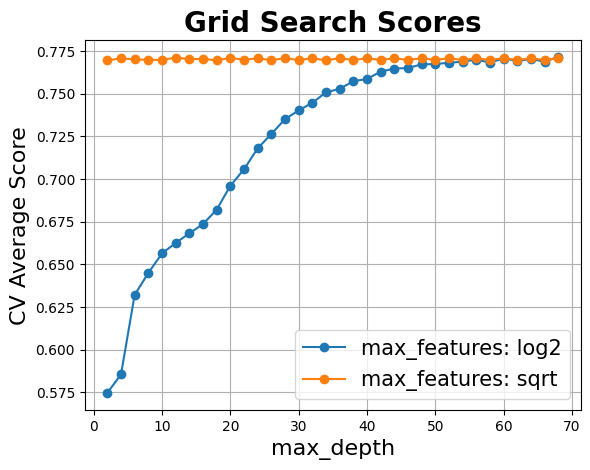

In [175]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

plot_grid_search(grid.cv_results_, parameters["max_depth"], parameters["max_features"], 'max_depth', 'max_features')

max_features algorithm 'log2 doesn't show any increase in accuracy, so we stay with standard 'sqrt'

In [176]:
parameters = {'max_leaf_nodes': range(1000, 8000, 400),'max_depth': range(4, 40, 2)}
grid = GridSearchCV(RandomForestClassifier(random_state=4536574, n_estimators=100, n_jobs=-1), parameters, cv=3).fit(X_train, y_train)

In [177]:
def plotSearchGrid(grid, parameters, name1, name2):
    
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid[name1]), len(grid.param_grid[name2]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
              )#norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid[name2])), grid.param_grid[name2], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid[name1])), grid.param_grid[name1])
    plt.title('Validation accuracy')
    plt.show()

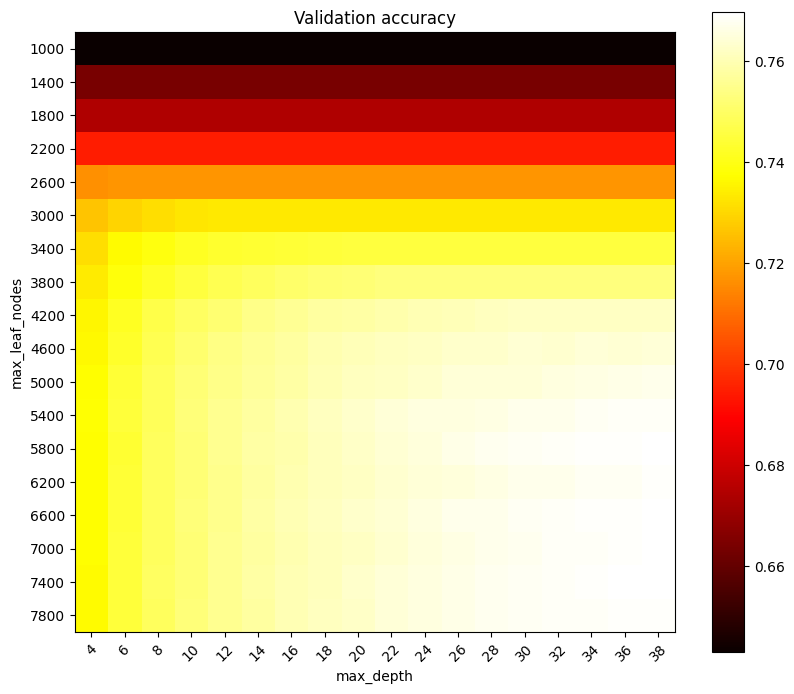

In [178]:
plotSearchGrid(grid, parameters, 'max_leaf_nodes', 'max_depth')

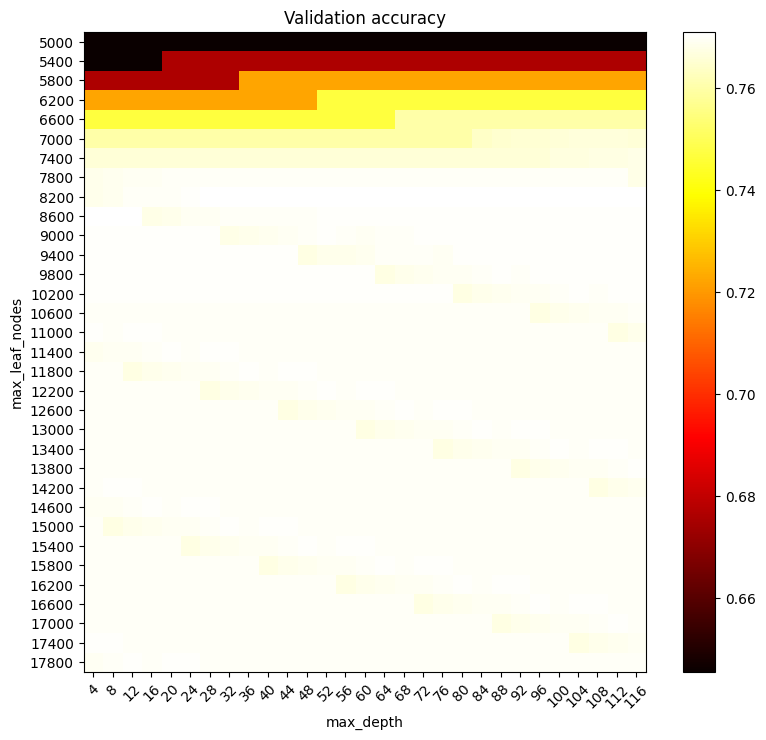

In [244]:
parameters = {'max_leaf_nodes': range(5000, 18000, 400),'max_depth': range(4, 120, 4)}
grid = GridSearchCV(RandomForestClassifier(random_state=4536574, n_estimators=100, n_jobs=-1), parameters, cv=3).fit(X_train, y_train)
plotSearchGrid(grid, parameters, 'max_leaf_nodes', 'max_depth')

### Best estimator

Let's look at the metrics of the best classifier.

In [248]:
clf = grid.best_estimator_

In [249]:
y_score = clf.predict_proba(X_test)

In [250]:
print(f"Train score: {clf.score(X_train, y_train)}, test score: {clf.score(X_test, y_test)}")
print("Recall for labels: ", recall_score(pd.Series(clf.predict(X_test)), y_test, average=None))
print("Precision for labels: ", precision_score(pd.Series(clf.predict(X_test)), y_test, average=None))
print("F1 for labels: ", f1_score(pd.Series(clf.predict(X_test)), y_test, average=None))

Train score: 0.9721057798694114, test score: 0.77705
Recall for labels:  [0.70878494 0.78131813 0.79736017]
Precision for labels:  [0.70039459 0.79113602 0.79494462]
F1 for labels:  [0.70456479 0.78619642 0.79615056]


For deeper understanding of the model's classification ability let't build ROC curve and calculate AUC. It will provide us with a robust, comprehensive metric that can capture the nuanced performance aspects of the model.

In [251]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
target_names = np.unique(y_test)
n_classes = len(target_names)
target_names

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.91
Macro-averaged One-vs-Rest ROC AUC score:
0.90


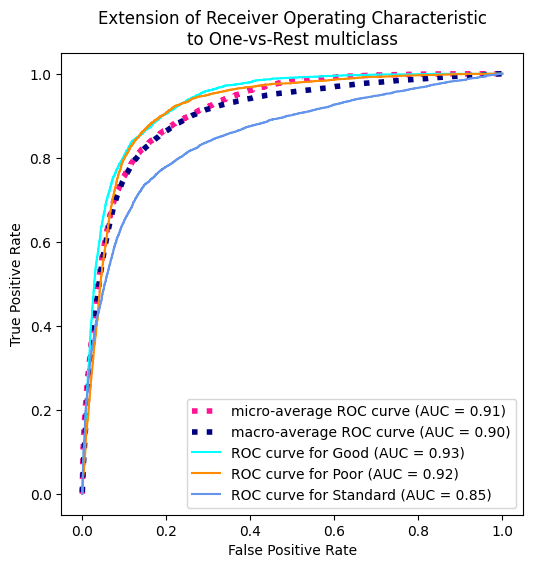

In [252]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

While the AUC of the label "Standard" could be better, the overall result looks good. <br>
Next, let's look at the model feature importances.

<Axes: xlabel='0', ylabel='None'>

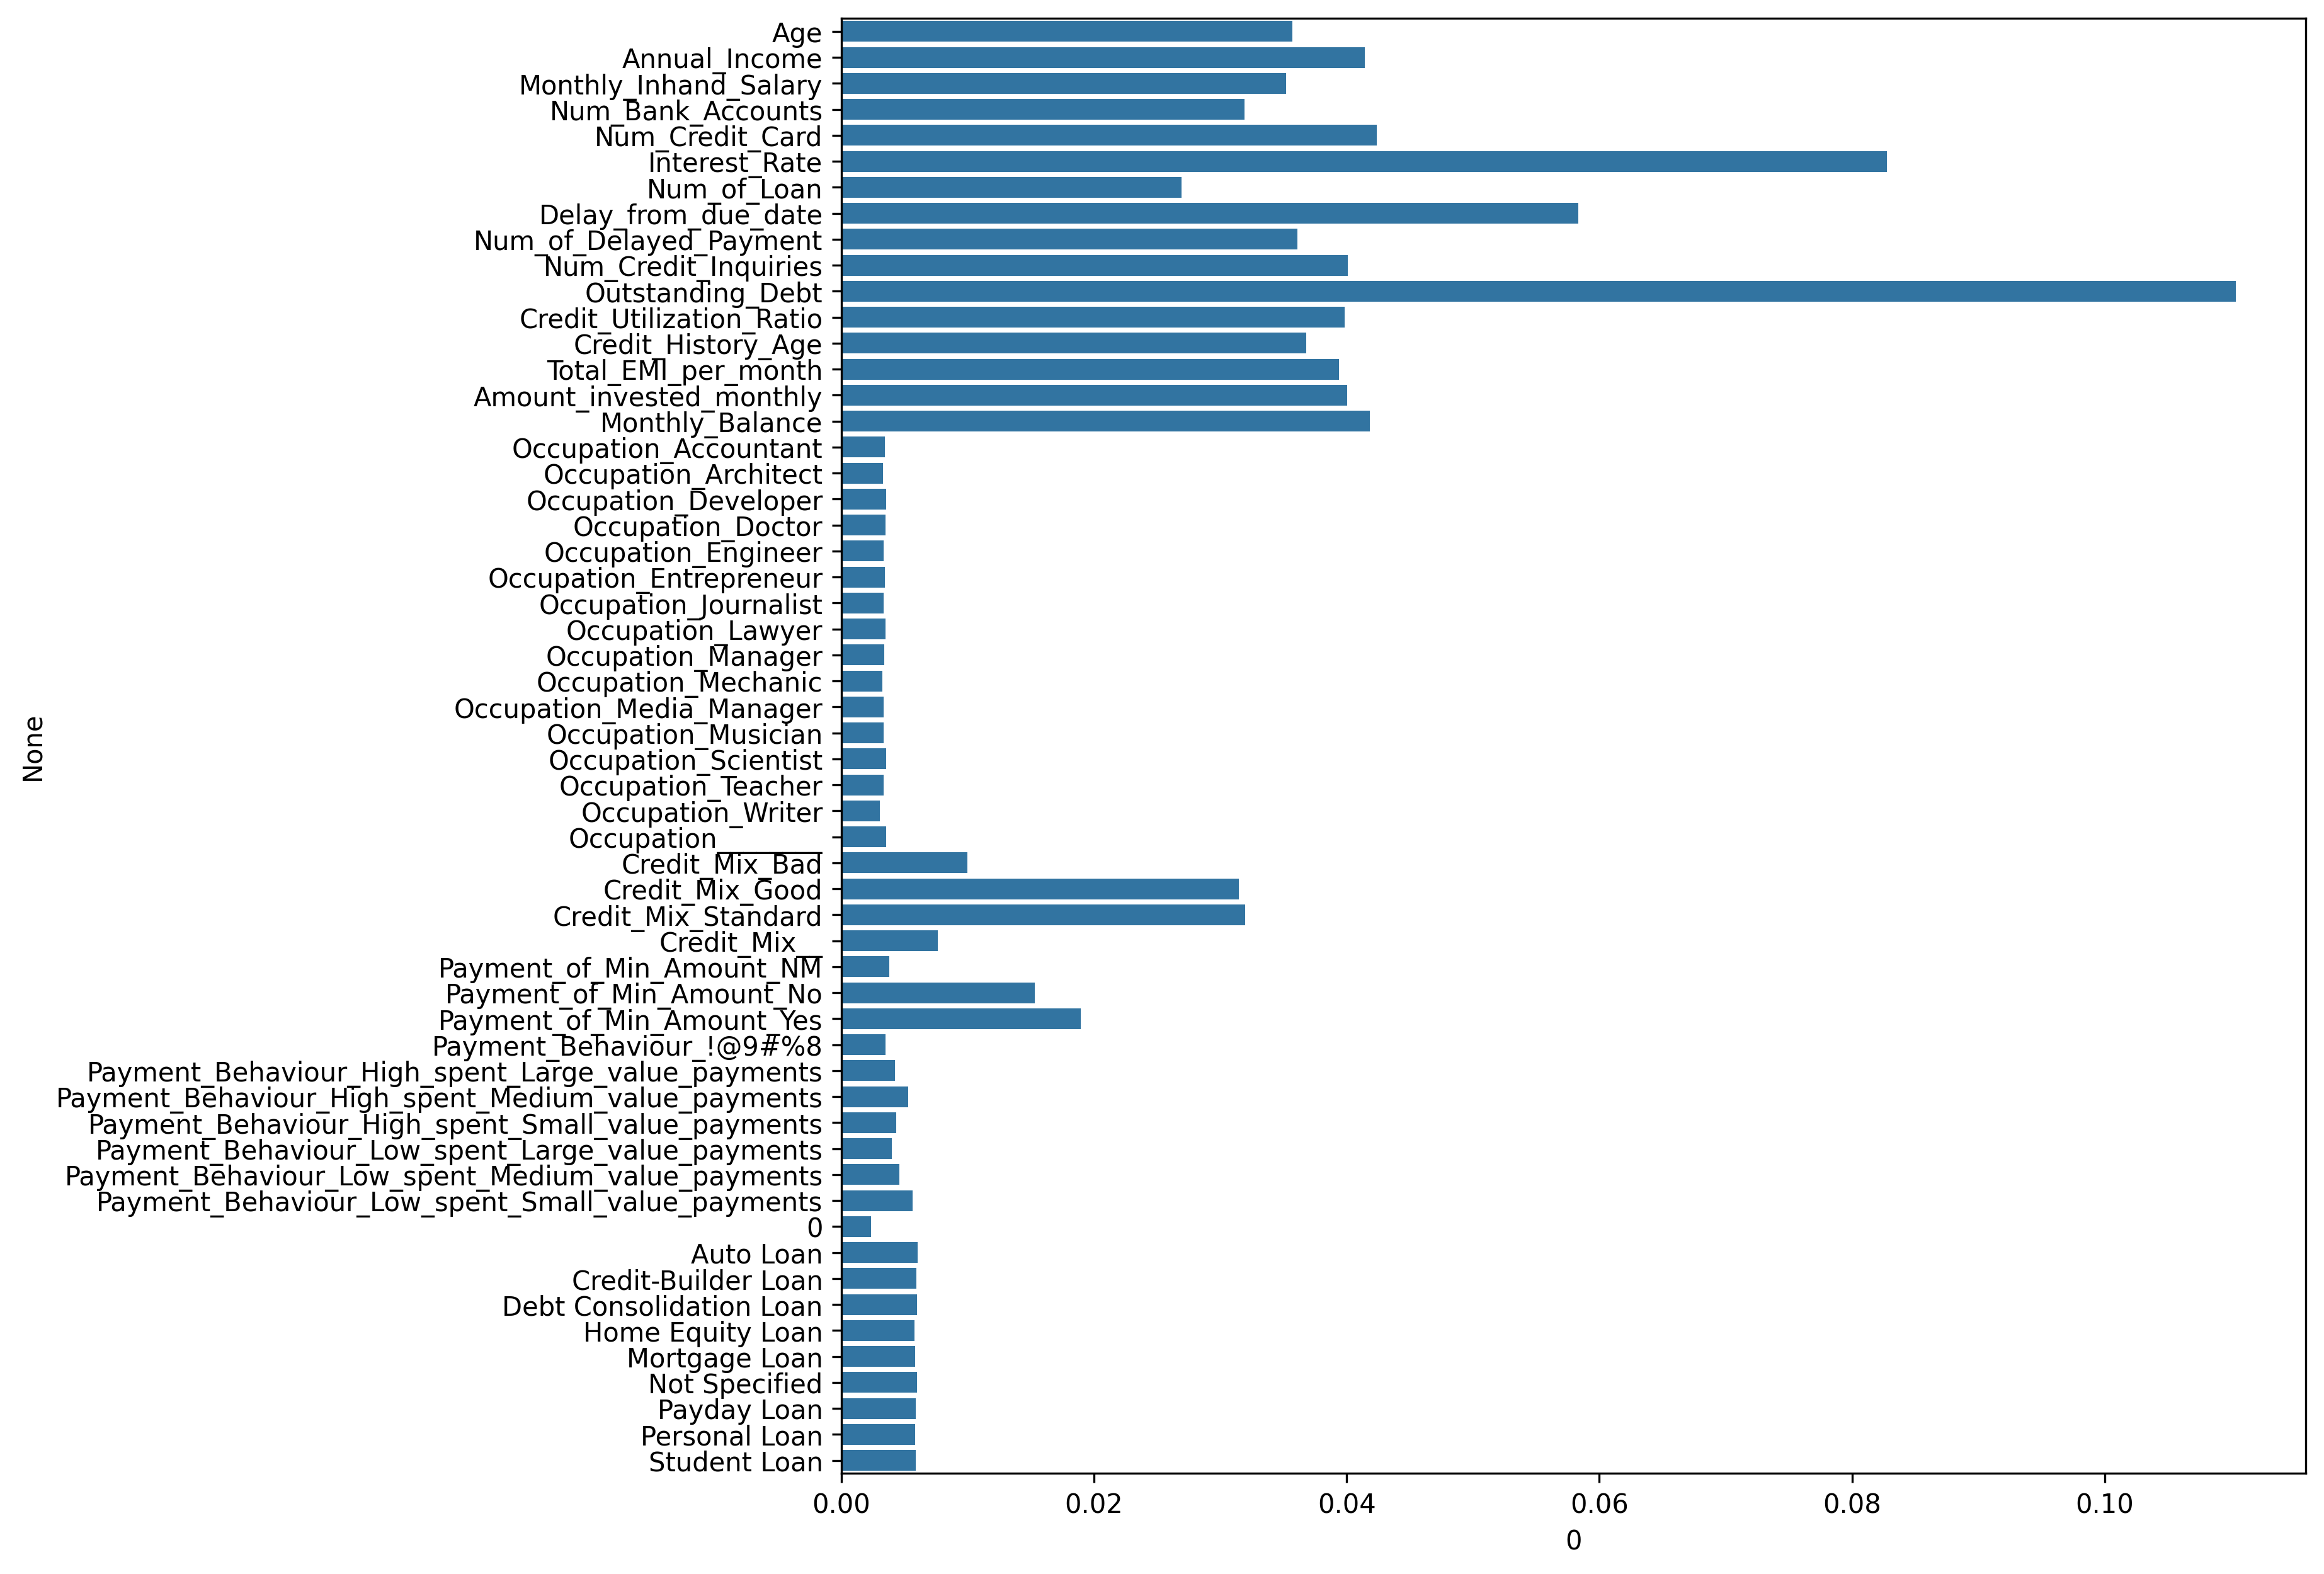

In [253]:
fig = plt.figure(figsize=(10, 10), dpi=300)
sns.barplot(data=pd.DataFrame(clf.feature_importances_, index=X_train.columns), y=X_train.columns, x = 0)

The most important features are "debt", "delay", and "interest rate", as we expected after calculating the correlation matrix. <br>
Also, this is a kind of vague result because the features are subcorrelated.<br>
Finally, let's look at the Confusion Matrix.

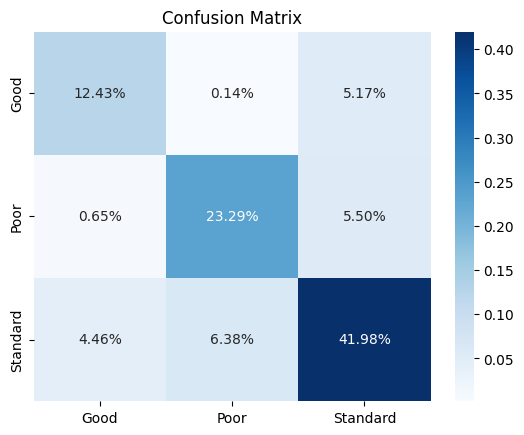

In [254]:
cm = confusion_matrix(y_test, clf.predict(X_test))
fig = plt.figure(dpi=100)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.show()

# Summary

### Takeaways

The model effectively tackles a real-world problem in the finance sector. <br>

Data preprocessing is critical, especially when the dataset comprises varied data types and formats. <br>

### Areas for Improvement
While Random Forest showed a good result, exploring other algorithms could perform even better. 